**Métodos de Previsão Aplicados @ MADSAD - CBS|ISCAC (2022/2023)**

**Trabalho - Parte 1 (25%)**

*Entregáveis:* 
1. este *notebook* resolvido (com **código e comentários** para cada uma das tarefas 2 a 7)
2. ficheiro csv de dados

*Submissão* até **22/03/2023 às 23:59** no InforEstudante

**Grupo** #:
* Carolina Freire (2021103980)

# _1. Contexto

<img src='https://www.bicycle-data.de/wp-content/uploads/2020/09/Logo_mitText-1024x375.png' width='120'> </br>
Os dados que vão ser trabalhados são as **contagens das passagens de bicicletas** numa localização exata na Europa ([Schering e Gómez, 2022, subsecção 2.1](https://doi.org/10.1016/j.trpro.2021.12.055)) e que são disponibilizados em [Bicycle Data](https://www.bicycle-data.de/), como dados abertos$^1$ (sob a licença [CC BY 4.0](https://creativecommons.org/licenses/by/4.0/)).

Estes dados são recolhidos por equipamentos chamados **contadores automáticos**, que, na sua grande maioria, são equipamentos da empresa [Eco Counters](https://pt.eco-counter.com/), como os exibidos [aqui](https://pt.eco-counter.com/especialidade/monitoramento-de-ciclistas/).


$^1$ Entre 4 e 10 de março de 2023, comemora-se o(s) [***Open Data Day(s)***](https://opendataday.org/).

<img src='https://boost.up.pt/wp-content/uploads/2019/01/SDG-ECF.png' width='80'> </br>
> **Tarefa 1:** Em três frases, relacionem os dados que vão tratar com **um** dos [objetivos de desenvolvimento sustentável](https://unric.org/en/sustainable-development-goals-cycling/) (ODS ou SDG, do inglês *sustainable development goals*) para justificar a relevância da sua análise.

Referências:
* [KnowSDGs (Knowledge base for the Sustainable Development Goals), European Commission](https://knowsdgs.jrc.ec.europa.eu/)
* [Cycling and Sustainable Development Goals, United Nations (UN)](https://unric.org/en/sustainable-development-goals-cycling/)

## **Resposta 1: Objetivo nº 11**

Os dados escolhidos pertencem a [maior cidade cosmopolitana da Alemanhã](https://www.dadosmundiais.com/europa/alemanha/index.php), Berlim, o que se dá tanto em decorrêcia da àrea da cidade quanto em razão do número de habitantes por metro quadrado. Além de ser uma das cidades mais populosas da União Europeia.

De tal modo que um dos objetivos sustentáveis que mais se adequam aos dados escolhidos, é o de nº 11, Cidades e Comunidades Sustentáveis (Sustainable cities and communities). O que, por consequência lógica, se estende aos objetivos de nº 9 e 13, Inovação da Industria e Inforestrutura (Industry innovation and infrastructure) e Ação Climática  (Climate Action). Que serão consideradas consequências esperadas e diretas do objetivo principal.

O Objetivo nº 11, inclui em seus própositos: (i) o [acesso](https://knowsdgs.jrc.ec.europa.eu/sdg/11), até 2030, a sistemas de transporte seguros, baratos, acessíveis e sustentáveis ​​para todos e (ii) a redução do impacto ambiental das cidades. 

Assim, o crescimento do ciclismo em cidades metropolitanas faz com que essas se tornem mais inclusivas, seguras e sustentáveis. Isso porque,  quanto maior o número de ciclistas, mais sustentável o sistema de transporte se torna.

Não obstante o certo enquadramento dos outros Objetivos de Desenvolvimento Sustentável ao tema, considerando-se os dados escolhidos e o seu contexto fático, o Desenvolvimento Sustentável de Cidades e Comunidades é o que se impõe.

# _2. Dados

Em [Open Bicycle’s Data](https://www.bicycle-data.de/bicycles-data/):
* em *choose kind*, selecionar ***Counting Data***
* em *choose region*, selecionar **uma** cidade/região (ℹ tem informação sobre o período temporal disponível)
* manter a *start date* e *end date* sugeridas, já que vão dar o maior período temporal disponível (ℹ volta a ter informação sobre o período temporal disponível)
* em *choose location*, selecionar **uma** localização
* em *choose attributes*, selecionar ***bothDirections*** e ***classification*** (ℹ tem informação sobre as variáveis disponíveis, sendo a informação dada em grupos de variáveis)
* em *choose the data format*, selecionar **csv**
* finalmente, clicar em ***Generate Data***

Para ajudar a escolher, consultar o ficheiro `bicycle_datasets_info.xlsx` fornecido no InforEstudante.

> **Tarefa 2:** Selecionar e fazer o *download* do ficheiro de dados. </br>
**⚠ Este conjunto tem que ter, no mínimo, dois anos de dados. Cada grupo tem que escolher um conjunto de dados diferente.** </br> 
O ficheiro csv é submetido juntamente com o *notebook*.


## **Resposta 2: Dados submetidos em anexo**


Para referência: Berlin; 06-FK-FRA-O.

Atributos e informações de acordo com as orientações fornecidas pela Professora.


# _3. Importar os dados

> **Tarefa 3:** Importar os dados para o Colab como `dataframe` do Python, fazer a primeira inspeção e, se necessário, corrigir os formatos (i.e., `Dtypes`).

## **Resposta 3: Importação dos dados**

In [225]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [226]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [227]:
file_path = '/content/drive/MyDrive/2022 - 2023/Métodos de Previsão Aplicados/TRABALHO/data_2017-01-01T00_00_00-2020-06-30T23_45_00_Berlin.csv'

In [228]:
df = pd.read_csv(file_path)
df.head()

,start,end,bothDirections,classification,station
0,2017-01-01 00:00:00,2017-01-01 00:15:00,0,Windy,06-FK-FRA-O
1,2017-01-01 00:15:00,2017-01-01 00:30:00,0,Windy,06-FK-FRA-O
2,2017-01-01 00:30:00,2017-01-01 00:45:00,0,Windy,06-FK-FRA-O
3,2017-01-01 00:45:00,2017-01-01 01:00:00,2,Windy,06-FK-FRA-O
4,2017-01-01 01:00:00,2017-01-01 01:15:00,2,Windy,06-FK-FRA-O


# _4. Verificar os *timestamps* nas mudanças para o horário de Verão e de Inverno

[Table of transition dates for European Summer Time](https://en.wikipedia.org/wiki/Summer_time_in_Europe)

| Start | End |
|::---:|:---:|
| 26 March 2017 | 29 October 2017 |
| 25 March 2018 | 28 October 2018 |
| 31 March 2019 | 27 October 2019 |
| 29 March 2020 | 25 October 2020 |
| 28 March 2021 | 31 October 2021 |
| 27 March 2022 | 30 October 2022 |
| 26 March 2023 | 29 October 2023 |

In all locations in Europe where summer time is observed (the EU, EFTA and associated countries), European Summer Time begins at 01:00 UTC/WET (02:00 CET, 03:00 EET) on the last Sunday in March and ends at 01:00 UTC (02:00 WEST, 03:00 CEST, 04:00 EEST) on the last Sunday in October each year; i.e. the change is made at the same absolute time across all time zones.

> **Tarefa 4:** Analisar o que acontece aos *timestamps* nas mudanças de horário de Verão, em março (em que se perde uma hora), e de Inverno, em outubro (em que se ganha uma hora).

## **Resposta 4.1: Formatação da *dataframe* para uma série temporal**

Inicialmente, vale estabelecer que Berlim se encontra no fuso horário (CET), UTC +1 e que a Alemanhã segue as regras estabelecidas pela União Europeia de horário de verão. Assim, no início do horário de verão a escala é alterada para (CEST), UTC +2 e, ao fim, a escala volta à anterior.

Dessa forma, para verificar os *timestamps* da mudança, temos que nos atentar aos dias de início e fim de 2017 a 2020, anos constantes nos dados escolhidos.

Contudo, antes disso, realizaremos a formatação da *dataframe* para uma série temporal:

In [229]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122531 entries, 0 to 122530
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   start           122531 non-null  object
 1   end             122531 non-null  object
 2   bothDirections  122531 non-null  int64 
 3   classification  122531 non-null  object
 4   station         122531 non-null  object
dtypes: int64(1), object(4)
memory usage: 4.7+ MB


In [230]:
df = df.assign(start = pd.to_datetime(df.start))
df = df.assign(end = pd.to_datetime(df.end))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122531 entries, 0 to 122530
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   start           122531 non-null  datetime64[ns]
 1   end             122531 non-null  datetime64[ns]
 2   bothDirections  122531 non-null  int64         
 3   classification  122531 non-null  object        
 4   station         122531 non-null  object        
dtypes: datetime64[ns](2), int64(1), object(2)
memory usage: 4.7+ MB


In [231]:
df = df.set_index('start')
df = df.set_index('end')
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 122531 entries, 2017-01-01 00:15:00 to 2020-07-01 00:00:00
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   bothDirections  122531 non-null  int64 
 1   classification  122531 non-null  object
 2   station         122531 non-null  object
dtypes: int64(1), object(2)
memory usage: 3.7+ MB


In [232]:
df.index

DatetimeIndex(['2017-01-01 00:15:00', '2017-01-01 00:30:00',
               '2017-01-01 00:45:00', '2017-01-01 01:00:00',
               '2017-01-01 01:15:00', '2017-01-01 01:30:00',
               '2017-01-01 01:45:00', '2017-01-01 02:00:00',
               '2017-01-01 02:15:00', '2017-01-01 02:30:00',
               ...
               '2020-06-30 21:45:00', '2020-06-30 22:00:00',
               '2020-06-30 22:15:00', '2020-06-30 22:30:00',
               '2020-06-30 22:45:00', '2020-06-30 23:00:00',
               '2020-06-30 23:15:00', '2020-06-30 23:30:00',
               '2020-06-30 23:45:00', '2020-07-01 00:00:00'],
              dtype='datetime64[ns]', name='end', length=122531, freq=None)

## **Resposta 4.2:**

Realizada a formatação, passamos a análise das datas em que houve mudança por horário de varão/inverno:

*   Considerando que a mudança para horário de verão foi contínua entre os anos de 2017 e 2020, não há necessidade de se analisar todos os anos, já que os resultados serão sempre os mesmos: a diminuição de uma hora no último domingo de março e o aumento de uma hora no último domingo de outubro.

*   No `início do horário de verão` podemos verificar que não constam registros às 02:00 hrs, que é a hora que foi 'perdida' pela mudança.

*   Já no `final do horário de verão`, ****


In [258]:
#início 2017
df.loc['2017-03-26 01:00:00' : '2017-03-26 04:00:00']

,bothDirections,classification,station
end,,,
2017-03-26 01:00:00,12,Cold,06-FK-FRA-O
2017-03-26 01:15:00,5,Cold,06-FK-FRA-O
2017-03-26 01:30:00,6,Cold,06-FK-FRA-O
2017-03-26 01:45:00,8,Cold,06-FK-FRA-O
2017-03-26 02:00:00,3,Cold,06-FK-FRA-O
2017-03-26 03:15:00,2,Cold,06-FK-FRA-O
2017-03-26 03:30:00,5,Cold,06-FK-FRA-O
2017-03-26 03:45:00,2,Cold,06-FK-FRA-O
2017-03-26 04:00:00,10,Cold,06-FK-FRA-O


In [259]:
#final 2017
df.loc['2017-10-29 01:00:00' : '2017-10-29 04:00:00']

,bothDirections,classification,station
end,,,
2017-10-29 01:00:00,3,Stormy,06-FK-FRA-O
2017-10-29 01:15:00,4,Stormy,06-FK-FRA-O
2017-10-29 01:30:00,0,Stormy,06-FK-FRA-O
2017-10-29 01:45:00,3,Rainstorm,06-FK-FRA-O
2017-10-29 02:00:00,1,Stormy,06-FK-FRA-O
2017-10-29 02:15:00,4,Stormy,06-FK-FRA-O
2017-10-29 02:30:00,2,Stormy,06-FK-FRA-O
2017-10-29 02:45:00,0,Stormy,06-FK-FRA-O
2017-10-29 03:00:00,5,Stormy,06-FK-FRA-O


# _5. Verificar a completude dos *timestamps*

> **Tarefa 5:** Verificar se os dados estão completos, concretamente, atendendo à periodicidade dos dados, verificar se não faltam *timestamps* e se a periodicidade é respeitada.

## **Resposta 5.1: Totalidade dos dados**

Na verificação de dados em falta do conjunto de dados, foi possível verificar o seguinte:


*   Teoricamente, não constam dados omissos no conjunto, vez que todas as colunas estão totalmente preenchidas. 

*   Contudo, considerando que esse conjunto contabiliza o número total de ciclistas  que passaram por essa estação específica, tem-se que `em alguns momentos, nenhum ciclista passou por esta estação de contagem`.

*   Nesses momentos, `o registro contabilizou tal questão com o valor '0'. Que ao todo totalizam 6.33% dos valores da coluna`.


In [235]:
df.round()

,bothDirections,classification,station
end,,,
2017-01-01 00:15:00,0,Windy,06-FK-FRA-O
2017-01-01 00:30:00,0,Windy,06-FK-FRA-O
2017-01-01 00:45:00,0,Windy,06-FK-FRA-O
2017-01-01 01:00:00,2,Windy,06-FK-FRA-O
2017-01-01 01:15:00,2,Windy,06-FK-FRA-O
...,...,...,...
2020-06-30 23:00:00,47,Warm,06-FK-FRA-O
2020-06-30 23:15:00,21,Windy,06-FK-FRA-O
2020-06-30 23:30:00,26,Windy,06-FK-FRA-O


In [236]:
df.describe().round(2)

,bothDirections
count,122531.00
mean,19.11
std,20.60
min,0.00
25%,3.00
50%,12.00
75%,28.00
max,281.00


In [237]:
# soma para verficar quantos dados omissos tem em cada coluna de dados:
miss_v = df.isnull().sum()
miss_v
# teoricamente não exitem dados omissos no conjunto, já que todas possuem algum valor

bothDirections    0
classification    0
station           0
dtype: int64

In [238]:
#verificação dos valores '0'.
zeros = (df == 0).sum()
zeros

bothDirections    7756
classification       0
station              0
dtype: int64

In [239]:
#verificação da porcentagem dos dados omissos:
zeros_p = (zeros/122531) * 100
print(zeros_p.round(2))
#representa 6.33% dos dados dessa coluna

bothDirections    6.33
classification    0.00
station           0.00
dtype: float64


##**Resposta 5.2: Respeito à periodicidade**

In [240]:
#aqui podemos oservar que a periodicidade de 15 min estabelecida pela pela contagem foi respeitada
df_aux = df.reset_index()
df_aux = df_aux.assign(previous_start = df_aux.end.shift(1))
df_aux = df_aux.assign(diff_consec_start = df_aux.end - df_aux.previous_start)
df_aux

,end,bothDirections,classification,station,previous_start,diff_consec_start
0,2017-01-01 00:15:00,0,Windy,06-FK-FRA-O,NaT,NaT
1,2017-01-01 00:30:00,0,Windy,06-FK-FRA-O,2017-01-01 00:15:00,0 days 00:15:00
2,2017-01-01 00:45:00,0,Windy,06-FK-FRA-O,2017-01-01 00:30:00,0 days 00:15:00
3,2017-01-01 01:00:00,2,Windy,06-FK-FRA-O,2017-01-01 00:45:00,0 days 00:15:00
4,2017-01-01 01:15:00,2,Windy,06-FK-FRA-O,2017-01-01 01:00:00,0 days 00:15:00
...,...,...,...,...,...,...
122526,2020-06-30 23:00:00,47,Warm,06-FK-FRA-O,2020-06-30 22:45:00,0 days 00:15:00
122527,2020-06-30 23:15:00,21,Windy,06-FK-FRA-O,2020-06-30 23:00:00,0 days 00:15:00
122528,2020-06-30 23:30:00,26,Windy,06-FK-FRA-O,2020-06-30 23:15:00,0 days 00:15:00
122529,2020-06-30 23:45:00,27,Windy,06-FK-FRA-O,2020-06-30 23:30:00,0 days 00:15:00


# _6. Adicionar *timestamps* em falta

> **Tarefa 6:** Caso existam *timestamps* em falta, acrescentá-los à *dataframe*, preenchendo com `NaN`.

## **Resposta 6: Sem necessidade**

Tendo em vista que a todos os timestamps estão completos, não há necessidade de adicionar outros.

# _7. Visualizar os dados com diferentes periodicidades

> **Tarefa 7:** Produzir os gráficos para a série das contagens com periodicidades diária, semanal e mensal. 

## **Resposta 7.1: Visualização simples**

In [241]:
plt.rcParams['figure.figsize'] = (15, 4)

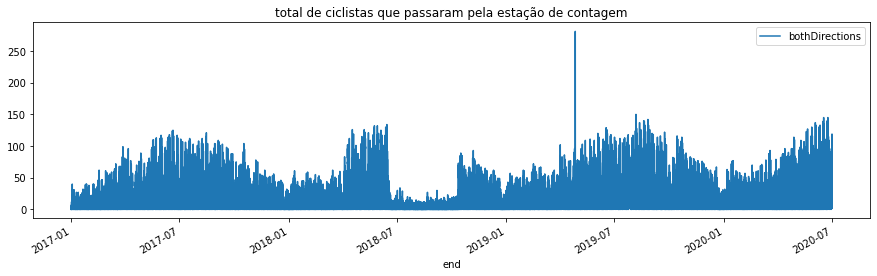

In [242]:
#gráfico com peridiciodidade normal
df.plot(title = 'total de ciclistas que passaram pela estação de contagem');

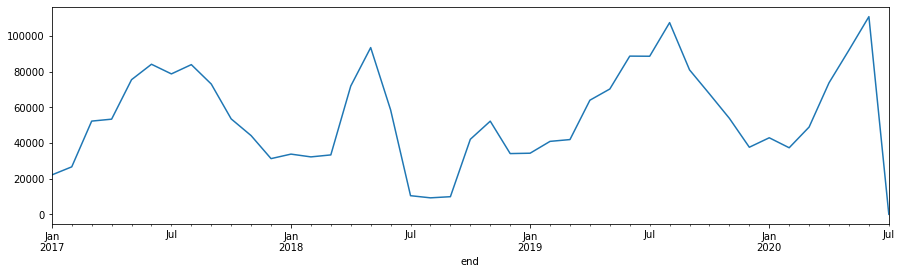

In [243]:
#gráfico com peridiciodidade mensal
df.bothDirections.resample('M').sum().plot(y='bothDirections');

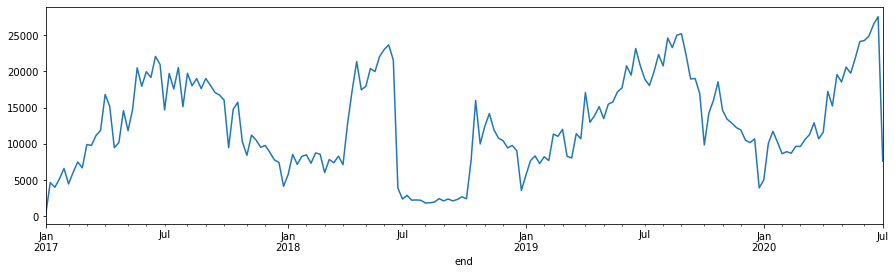

In [244]:
#gráfico com peridiciodidade semanal
df.bothDirections.resample('W').sum().plot(y='bothDirections');

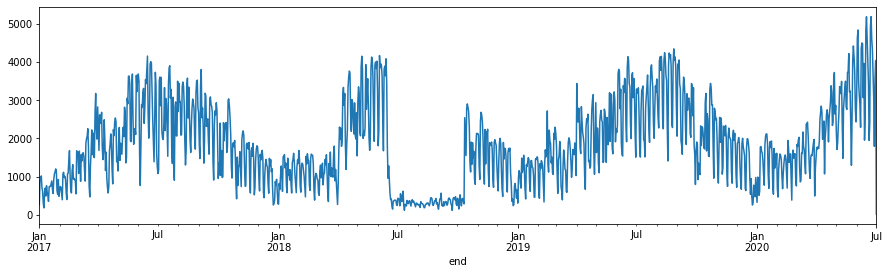

In [245]:
#gráfico com peridiciodidade diária
df.bothDirections.resample('D').sum().plot(y='bothDirections');

## **Resposta 7.2: Visualização interativa**

In [248]:
fig = px.line(df, x=df.index, y=df.bothDirections)
fig.update_xaxes(rangeslider_visible=True)
# linha acima fornece a interatividade em relação ao tempo.pode ser retirada se necessário
fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [260]:
#possibilidade de seleção da área que se pretende analisar
fig = px.line(df, x=df.index, y=df.bothDirections)
fig.update_xaxes(minor=dict(ticks="inside", showgrid=True))
fig.show()

Output hidden; open in https://colab.research.google.com to view.